# Step 0 - import NN libraries

In [1]:
# Libraries import
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import keras
from collections import Counter

# Step 1 - Load the data 

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape


(60000, 28, 28)

In [4]:
x_train[0].shape

(28, 28)

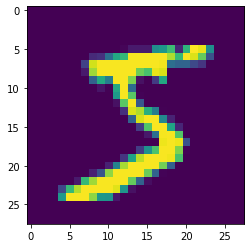

In [5]:
plt.imshow(x_train[0])

In [6]:
y_train[0]

5

# Step 2 - Data pre-processing

In [7]:
x_train = x_train / 255

In [8]:
x_test = x_test / 255

# Step 3 - Divide dataset into Train/Test

In [9]:
x_dev = x_train[55000:60000]

In [10]:
y_dev = y_train[55000:60000]

# Step 4 - Build a simple dense network, use ExponentialLearningRate()

In [11]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

# Step 5 - Use sigmoid, relu, and softmax as activation functions

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# Step 6 - Plot loss as a function of learning rate
# Step 8 - compile losses, use various optimizers.

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer= "sgd",
metrics=["accuracy"])


fitted_model = model.fit(x_train,y_train,validation_data=(x_dev,y_dev),epochs=100,callbacks = [tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)])

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6201 - accuracy: 0.8369 - val_loss: 0.2575 - val_accuracy: 0.9320
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2915 - accuracy: 0.9162 - val_loss: 0.2003 - val_accuracy: 0.9464
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2425 - accuracy: 0.9317 - val_loss: 0.1733 - val_accuracy: 0.9534
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2128 - accuracy: 0.9390 - val_loss: 0.1540 - val_accuracy: 0.9586
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1929 - accuracy: 0.9452 - val_loss: 0.1415 - val_accuracy: 0.9638
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1775 - accuracy: 0.9495 - val_loss: 0.1304 - val_accuracy: 0.9654
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1659 - accuracy: 0.9519 - val_loss: 0.1234 - val_ac

1875/1875 [==============================] - 3s 2ms/step - loss: 0.1038 - accuracy: 0.9713 - val_loss: 0.0822 - val_accuracy: 0.9782
Epoch 58/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1038 - accuracy: 0.9713 - val_loss: 0.0822 - val_accuracy: 0.9782
Epoch 59/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1038 - accuracy: 0.9713 - val_loss: 0.0821 - val_accuracy: 0.9782
Epoch 60/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1038 - accuracy: 0.9713 - val_loss: 0.0821 - val_accuracy: 0.9782
Epoch 61/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1038 - accuracy: 0.9713 - val_loss: 0.0821 - val_accuracy: 0.9782
Epoch 62/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1038 - accuracy: 0.9713 - val_loss: 0.0821 - val_accuracy: 0.9782
Epoch 63/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1037 - accuracy: 0.9713 - val_loss: 0.0821 - val_accuracy

In [14]:
fitted_model.history

{'loss': [0.6200823783874512,
  0.2914898693561554,
  0.24247609078884125,
  0.21282468736171722,
  0.19292840361595154,
  0.17746837437152863,
  0.16585558652877808,
  0.15655487775802612,
  0.14871464669704437,
  0.14275449514389038,
  0.13725493848323822,
  0.13299335539340973,
  0.12924760580062866,
  0.1260017305612564,
  0.12328295409679413,
  0.12084194272756577,
  0.11886189877986908,
  0.11704883724451065,
  0.11555403470993042,
  0.11412755399942398,
  0.1128537505865097,
  0.11194588243961334,
  0.11095449328422546,
  0.11016163229942322,
  0.10937875509262085,
  0.1087854653596878,
  0.10818780958652496,
  0.10772073268890381,
  0.1072748526930809,
  0.10686168819665909,
  0.10652310401201248,
  0.10620391368865967,
  0.10590333491563797,
  0.10569433122873306,
  0.10545797646045685,
  0.10526765137910843,
  0.10509661585092545,
  0.10493771731853485,
  0.10479743033647537,
  0.10468257963657379,
  0.10456953942775726,
  0.1044744923710823,
  0.10438694059848785,
  0.104310

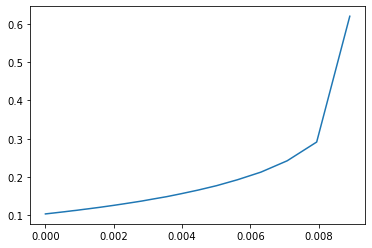

In [15]:
plt.plot(fitted_model.history['lr'], fitted_model.history['loss'])

# Step 7 - What is the value of lr when loss shoots up? Report answer.

value of LR where loss shoots up is 0.008

# Step 9 - Use earlystoppping() when the desired metric has stopped improving

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer= "sgd",
metrics=["accuracy"])
#early stopping
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
restore_best_weights=True)


fitted_model = model.fit(x_train,y_train,validation_data=(x_dev,y_dev),epochs=100,callbacks = [tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn),early_stopping_cb])

Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1060 - accuracy: 0.9697 - val_loss: 0.0765 - val_accuracy: 0.9790
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0976 - accuracy: 0.9722 - val_loss: 0.0721 - val_accuracy: 0.9822: 1s - loss: 0.099
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0906 - accuracy: 0.9745 - val_loss: 0.0673 - val_accuracy: 0.98280s - loss: 0.0917 - accuracy
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0849 - accuracy: 0.9765 - val_loss: 0.0662 - val_accuracy: 0.9838s: 0.0844 - accura
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0806 - accuracy: 0.9771 - val_loss: 0.0604 - val_accuracy: 0.9850
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0767 - accuracy: 0.9787 - val_loss: 0.0600 - val_accuracy: 0.9846
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/st

Epoch 57/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0524 - accuracy: 0.9866 - val_loss: 0.0429 - val_accuracy: 0.9894
Epoch 58/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0524 - accuracy: 0.9866 - val_loss: 0.0429 - val_accuracy: 0.9894
Epoch 59/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0524 - accuracy: 0.9866 - val_loss: 0.0428 - val_accuracy: 0.9894
Epoch 60/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0524 - accuracy: 0.9866 - val_loss: 0.0428 - val_accuracy: 0.9894
Epoch 61/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0524 - accuracy: 0.9866 - val_loss: 0.0428 - val_accuracy: 0.9894
Epoch 62/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0524 - accuracy: 0.9866 - val_loss: 0.0428 - val_accuracy: 0.9894
Epoch 63/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0524 - accuracy: 0.9866 - val_loss: 0.0428 -

In [17]:
fitted_model.history

{'loss': [0.10604789108037949,
  0.09761937707662582,
  0.09057873487472534,
  0.08486243337392807,
  0.08058758080005646,
  0.07667405903339386,
  0.07340098917484283,
  0.07084229588508606,
  0.06830092519521713,
  0.06634629517793655,
  0.06465878337621689,
  0.06310289353132248,
  0.06194789335131645,
  0.06080545112490654,
  0.05974467471241951,
  0.058975160121917725,
  0.0582110770046711,
  0.057564690709114075,
  0.0569603256881237,
  0.05638556182384491,
  0.0559411346912384,
  0.05557543411850929,
  0.055235181003808975,
  0.05486948415637016,
  0.05463876202702522,
  0.054386205971241,
  0.05415552109479904,
  0.0539739653468132,
  0.05378163233399391,
  0.05362321436405182,
  0.053517699241638184,
  0.05336642637848854,
  0.053261686116456985,
  0.0531756617128849,
  0.053084734827280045,
  0.052991461008787155,
  0.05293366312980652,
  0.0528770312666893,
  0.05281912907958031,
  0.052771780639886856,
  0.052727315574884415,
  0.052687808871269226,
  0.05265369638800621,
 

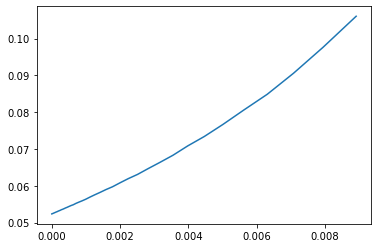

In [18]:
plt.plot(fitted_model.history['lr'], fitted_model.history['loss'])

# Step 10 - create checkpoint

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer= "sgd",
metrics=["accuracy"])
#early stopping
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
restore_best_weights=True)

#checkpoint
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
save_best_only=True)

fitted_model = model.fit(x_train,y_train,validation_data=(x_dev,y_dev),epochs=100,callbacks = [tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn),early_stopping_cb,checkpoint_cb])

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0559 - accuracy: 0.9849 - val_loss: 0.0426 - val_accuracy: 0.9894
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0527 - accuracy: 0.9863 - val_loss: 0.0389 - val_accuracy: 0.9904
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0495 - accuracy: 0.9871 - val_loss: 0.0414 - val_accuracy: 0.9880
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0471 - accuracy: 0.9875 - val_loss: 0.0361 - val_accuracy: 0.9912
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0449 - accuracy: 0.9883 - val_loss: 0.0352 - val_accuracy: 0.9920
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0430 - accuracy: 0.9894 - val_loss: 0.0333 - val_accuracy: 0.9920
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0414 - accuracy: 0.9898 - val_loss: 0.0334 - val_ac

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0306 - accuracy: 0.9934 - val_loss: 0.0261 - val_accuracy: 0.9944
Epoch 58/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0306 - accuracy: 0.9934 - val_loss: 0.0261 - val_accuracy: 0.9944
Epoch 59/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0306 - accuracy: 0.9934 - val_loss: 0.0261 - val_accuracy: 0.9944
Epoch 60/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0306 - accuracy: 0.9935 - val_loss: 0.0261 - val_accuracy: 0.9944
Epoch 61/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0306 - accuracy: 0.9935 - val_loss: 0.0261 - val_accuracy: 0.9944
Epoch 62/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0306 - accuracy: 0.9935 - val_loss: 0.0261 - val_accuracy: 0.9944
Epoch 63/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0306 - accuracy: 0.9935 - val_loss: 0.0261 - val_accuracy

In [20]:
fitted_model.history

{'loss': [0.05594524368643761,
  0.05265171453356743,
  0.04954485967755318,
  0.047104109078645706,
  0.04485919326543808,
  0.04297889396548271,
  0.04140784591436386,
  0.03998570889234543,
  0.038817450404167175,
  0.03791627660393715,
  0.03705544024705887,
  0.036201078444719315,
  0.03560654819011688,
  0.03504673019051552,
  0.03458896651864052,
  0.03403020277619362,
  0.03367963433265686,
  0.033356789499521255,
  0.03303268551826477,
  0.032747261226177216,
  0.0325094573199749,
  0.03231050819158554,
  0.03210826590657234,
  0.03192486613988876,
  0.031770169734954834,
  0.031664494425058365,
  0.03154456615447998,
  0.03143865987658501,
  0.03135579824447632,
  0.031264860183000565,
  0.03119007684290409,
  0.03112764284014702,
  0.031072357669472694,
  0.031017789617180824,
  0.03097057342529297,
  0.03093465231359005,
  0.030892616137862206,
  0.030860314145684242,
  0.030828362330794334,
  0.030806658789515495,
  0.03078126534819603,
  0.03075849637389183,
  0.030740503

In [ ]:
plt.plot(fitted_model.history['lr'], fitted_model.history['loss'])